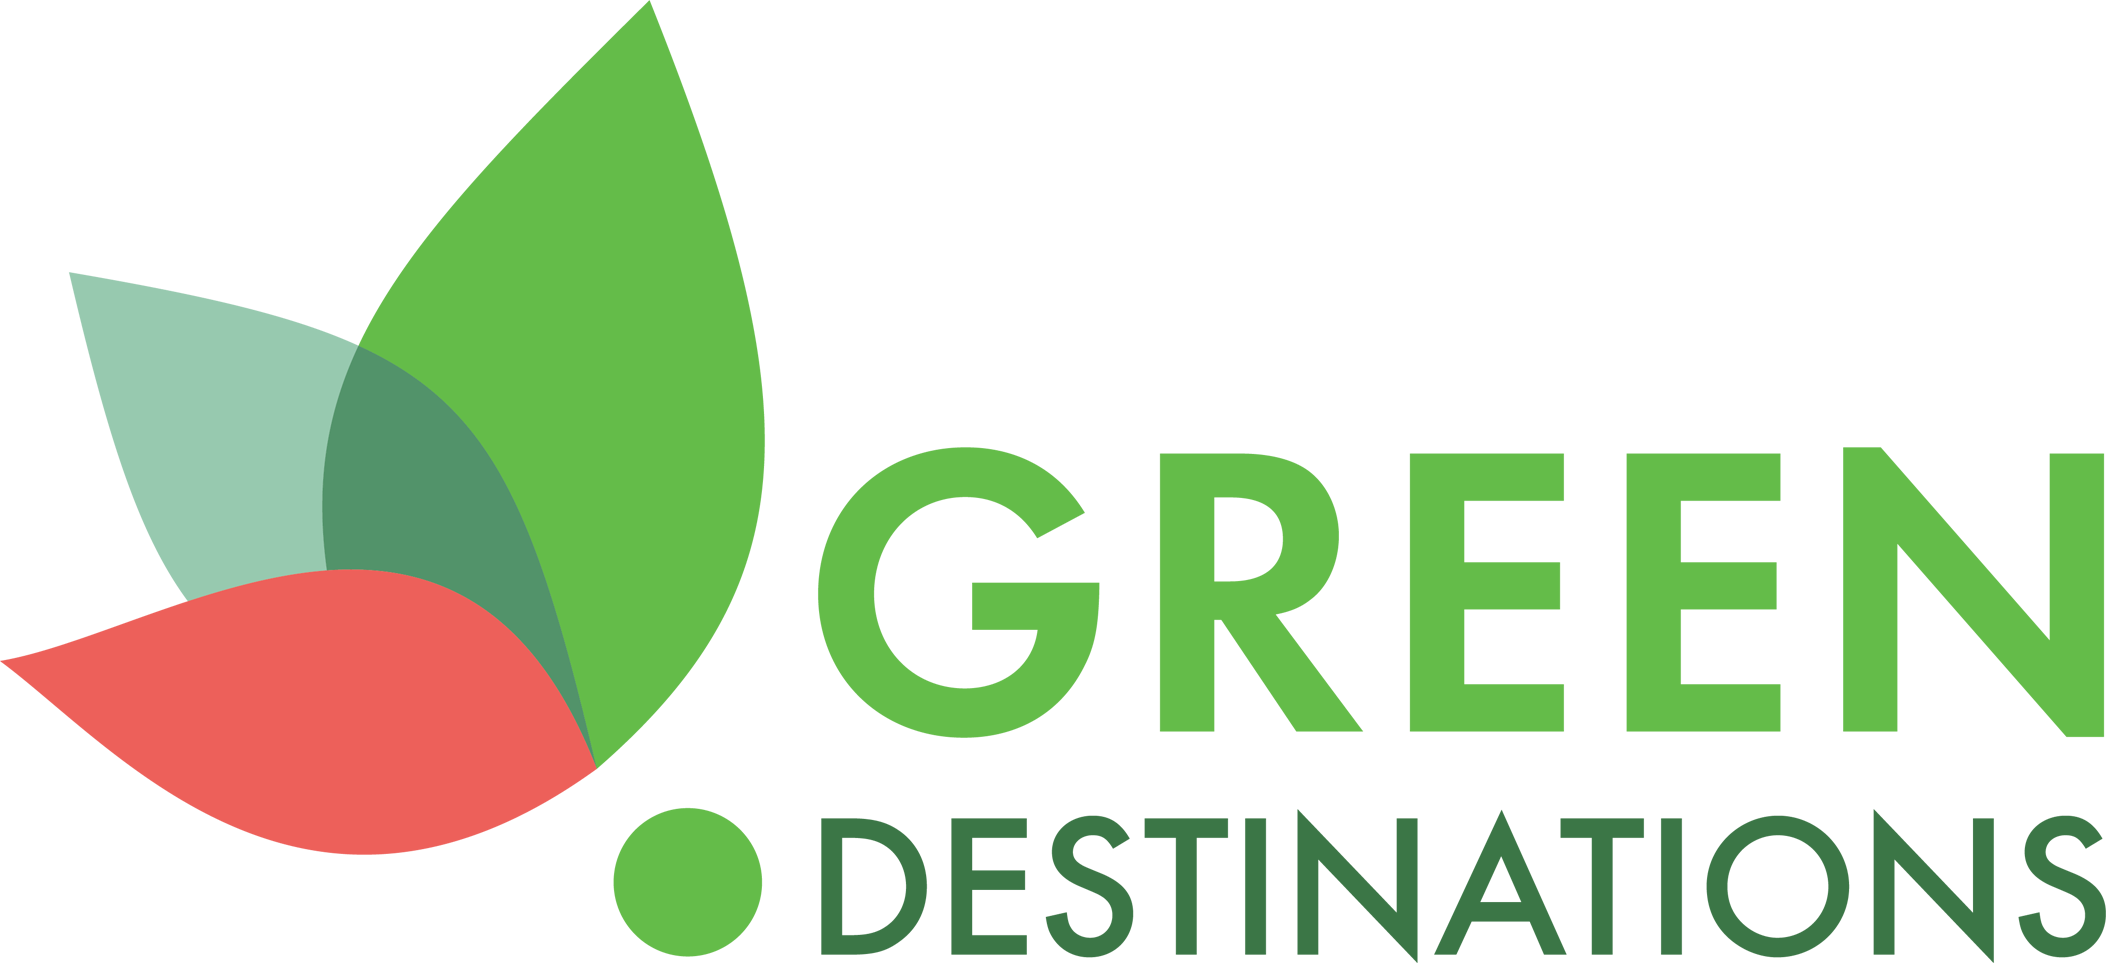

"Employee attrition factors"

Employee attrition happens when workers leave their jobs unexpectedly. This can be due to reasons like retirement, resignations, health issues, or even sudden death. When companies lose too many employees, it can lead to wasted resources and extra costs.


**Project Goals**

This project aims to tackle employee attrition by:

**1.Understanding Why Employees Leave:**  want to find out the main reasons behind employee turnover so companies can address these issues.

**2.Creating a Prediction Model:** We will develop a machine learning model that helps predict which employees might leave. This way, companies can take action to keep their valuable team members.

By focusing on these goals, we hope to help companies reduce attrition, keep their employees happy, and create a more stable work environment. Let’s work together to make a positive change

**Libraries**

In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn import metrics
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import iplot
from warnings import filterwarnings
filterwarnings("ignore")

Import Dataset

In [265]:
df_green=pd.read_csv("/content/greendestination.csv")

In [266]:
df_green

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [267]:
df_green.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

**Dataset Overview**

Target Variable:
The target is binary, indicating two possible outcomes.

Features:
Among the 34 available features:
8 features are categorical (in the form of objects).

The remaining 26 features are numerical.


In [268]:
#check NaN
df_green.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [269]:
df_green.duplicated().sum()

0

Dataset is clean and well-structured, with no missing values or duplicate rows.

Consider for columns Removal

Over18:

This column contains only the value "Y" for all entries, providing no variability.

EmployeeCount:

All values in this column are "1.0," which does not add any useful information for our analysis.

StandardHours:

Every entry in this column is "80.0," indicating a lack of variation.

EmployeeNumber:

This column serves as an identifier for employees but does not influence the analysis results

In [270]:
df_green = df_green.drop(['Over18', 'EmployeeNumber','EmployeeCount','StandardHours'],axis=1)

In [271]:
df_green

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


**Separation of Columns**

In [272]:
green_cat = df_green.select_dtypes(['object']).columns
green_num= df_green.select_dtypes(['number']).columns

In [273]:
green_cat

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [274]:
green_num

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [275]:
#for features in df_green_cat:
    #print('Unique values of ', features, set(df_green[features]))

Univariate analysis of df_green_cat:

Univariate Analysis for 'Attrition':
           Count  Percentage
Attrition                   
No          1233   83.877551
Yes          237   16.122449




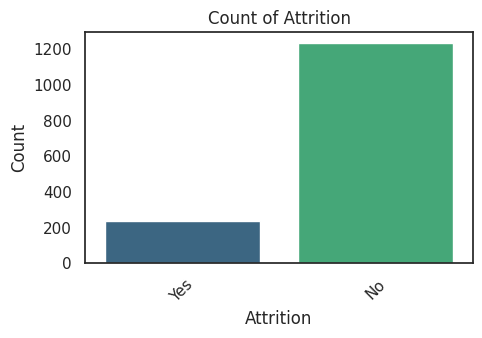

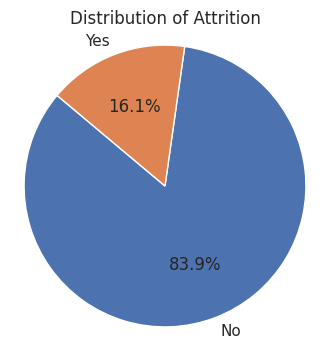

Univariate Analysis for 'BusinessTravel':
                   Count  Percentage
BusinessTravel                      
Travel_Rarely       1043   70.952381
Travel_Frequently    277   18.843537
Non-Travel           150   10.204082




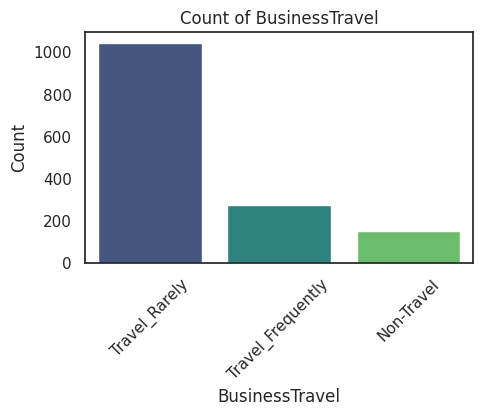

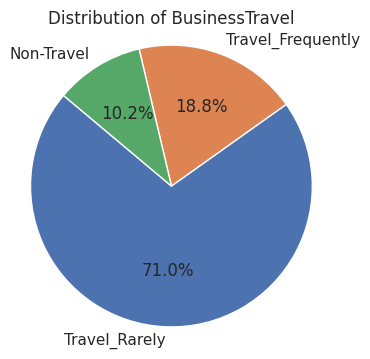

Univariate Analysis for 'Department':
                        Count  Percentage
Department                               
Research & Development    961   65.374150
Sales                     446   30.340136
Human Resources            63    4.285714




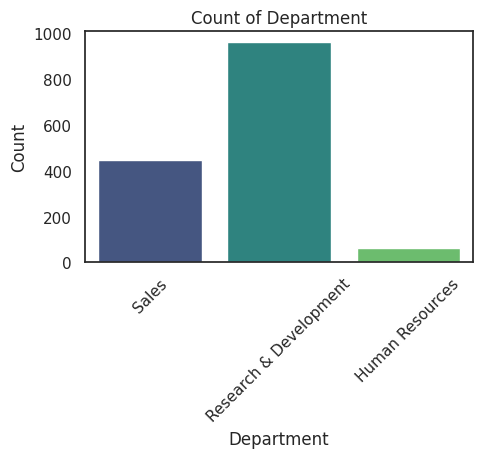

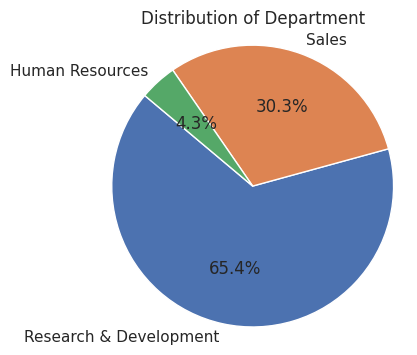

Univariate Analysis for 'EducationField':
                  Count  Percentage
EducationField                     
Life Sciences       606   41.224490
Medical             464   31.564626
Marketing           159   10.816327
Technical Degree    132    8.979592
Other                82    5.578231
Human Resources      27    1.836735




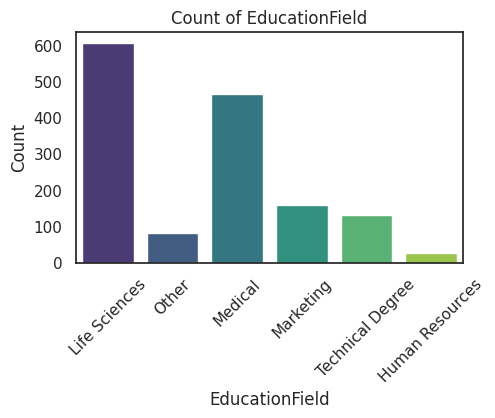

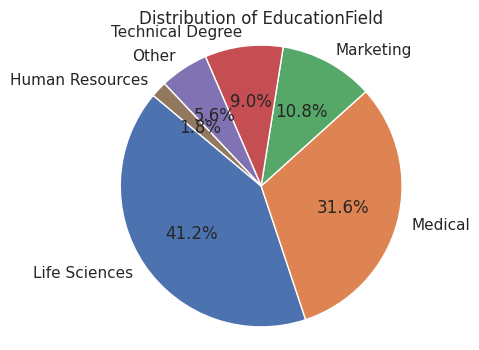

Univariate Analysis for 'Gender':
        Count  Percentage
Gender                   
Male      882        60.0
Female    588        40.0




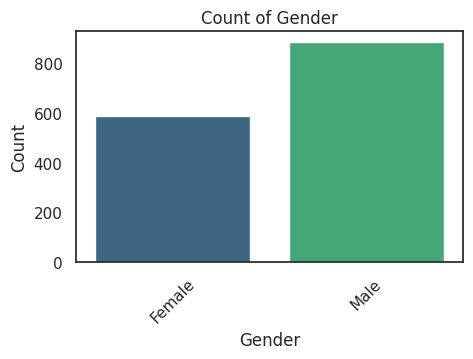

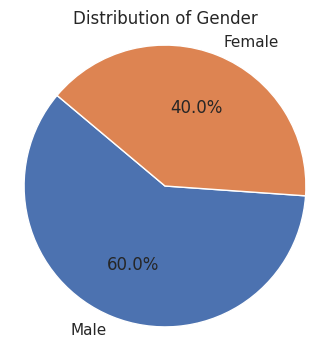

Univariate Analysis for 'JobRole':
                           Count  Percentage
JobRole                                     
Sales Executive              326   22.176871
Research Scientist           292   19.863946
Laboratory Technician        259   17.619048
Manufacturing Director       145    9.863946
Healthcare Representative    131    8.911565
Manager                      102    6.938776
Sales Representative          83    5.646259
Research Director             80    5.442177
Human Resources               52    3.537415




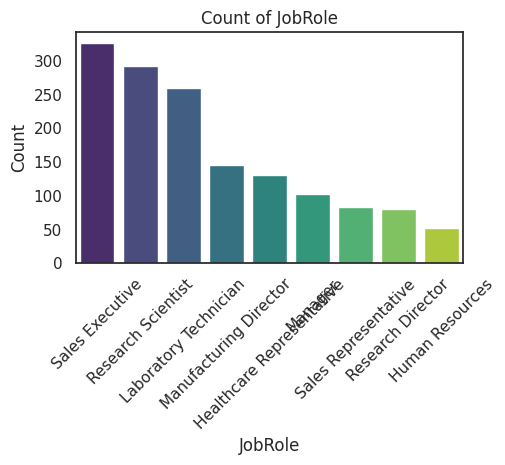

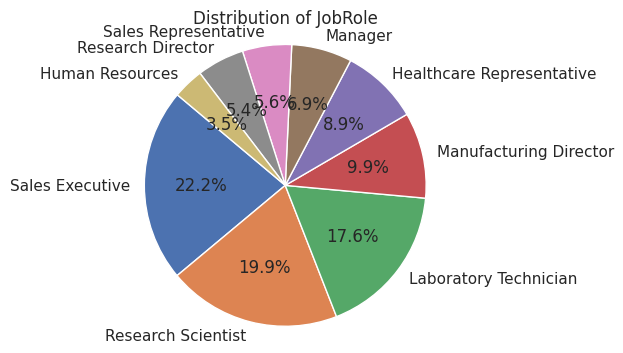

Univariate Analysis for 'MaritalStatus':
               Count  Percentage
MaritalStatus                   
Married          673   45.782313
Single           470   31.972789
Divorced         327   22.244898




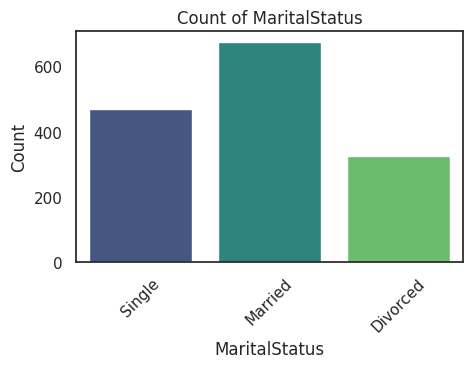

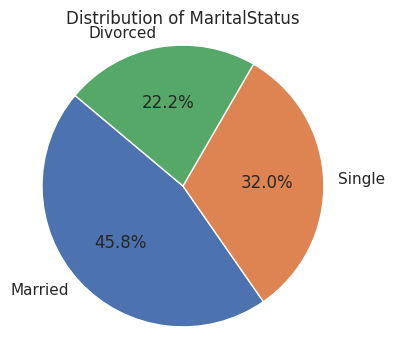

Univariate Analysis for 'OverTime':
          Count  Percentage
OverTime                   
No         1054    71.70068
Yes         416    28.29932




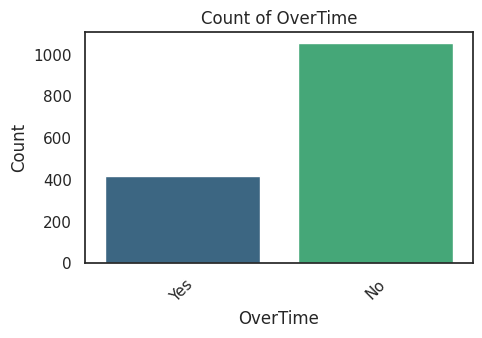

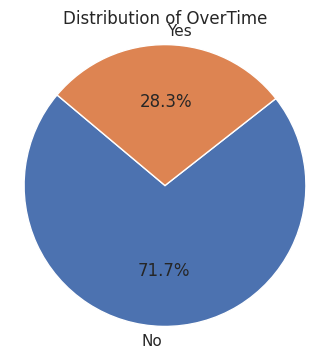

In [276]:
# Function to perform univariate analysis on categorical data
def univariate_analysis_categorical(df_green, columns):
    for column in columns:
        # Frequency table
        frequency_table = df_green[column].value_counts()
        percentage_table = df_green[column].value_counts(normalize=True) * 100

        # Combine frequency and percentage into one DataFrame
        analysis_table = pd.DataFrame({
            'Count': frequency_table,
            'Percentage': percentage_table
        })

        print(f"Univariate Analysis for '{column}':")
        print(analysis_table)
        print("\n")

        # Bar Plot
        plt.figure(figsize=(5, 3))
        sns.countplot(data=df_green, x=column, palette='viridis')
        plt.title(f'Count of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

        # Pie Chart
        plt.figure(figsize=(4, 4))
        plt.pie(frequency_table, labels=frequency_table.index, autopct='%1.1f%%', startangle=140)
        plt.title(f'Distribution of {column}')
        plt.axis('equal')
        plt.show()

# Perform univariate analysis on multiple columns
# Ensure the columns you are passing exist in df_green
univariate_analysis_categorical(df_green, ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'])

**Attrition with other features**

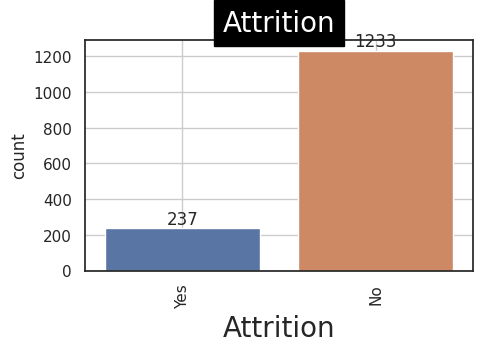

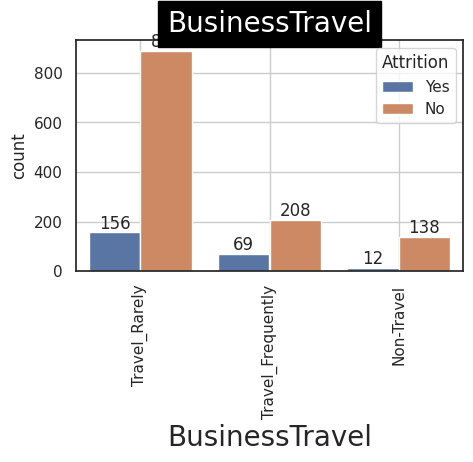

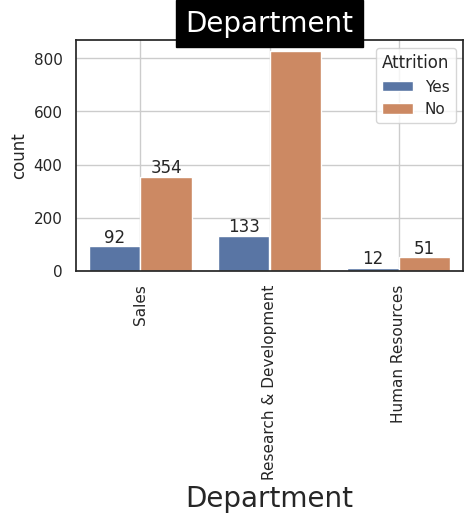

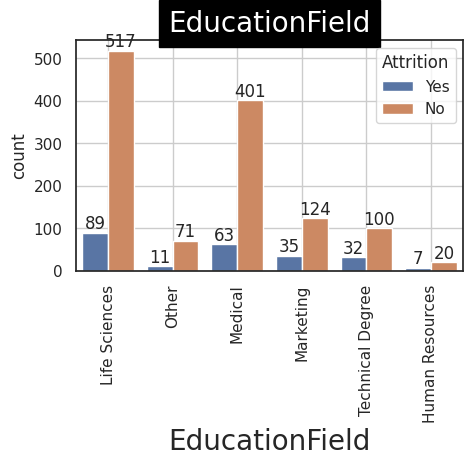

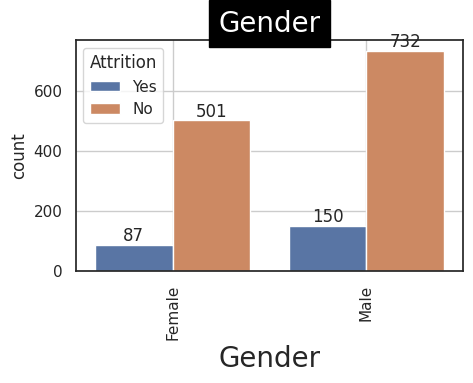

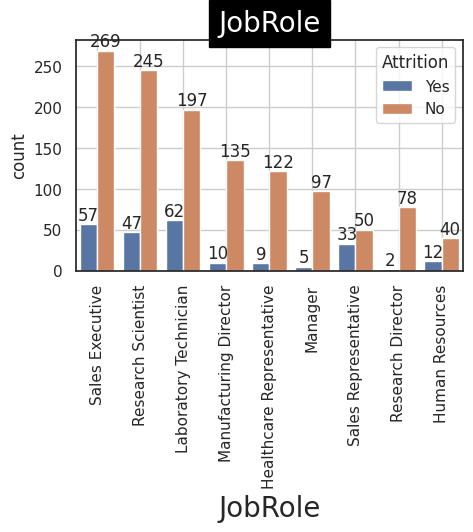

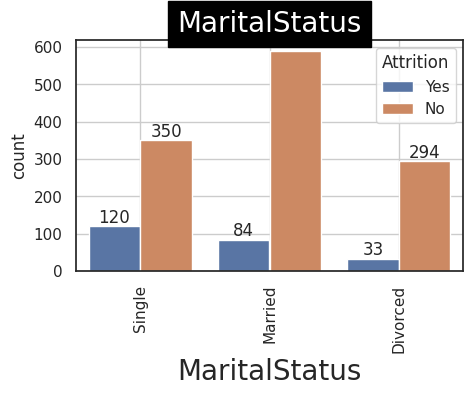

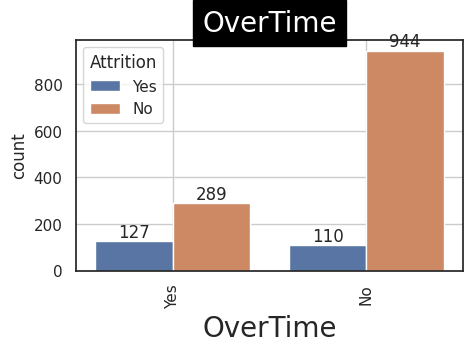

In [277]:
for column in green_cat:
    plt.figure(figsize=(5,3))

    ax=sns.countplot(x=df_green[column], data=df_green,hue="Attrition")
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(column,backgroundcolor='black',color='white',fontsize=20)
    plt.xticks(rotation=90)
    plt.xlabel(column,fontsize=20)
    plt.grid()
    plt.show()

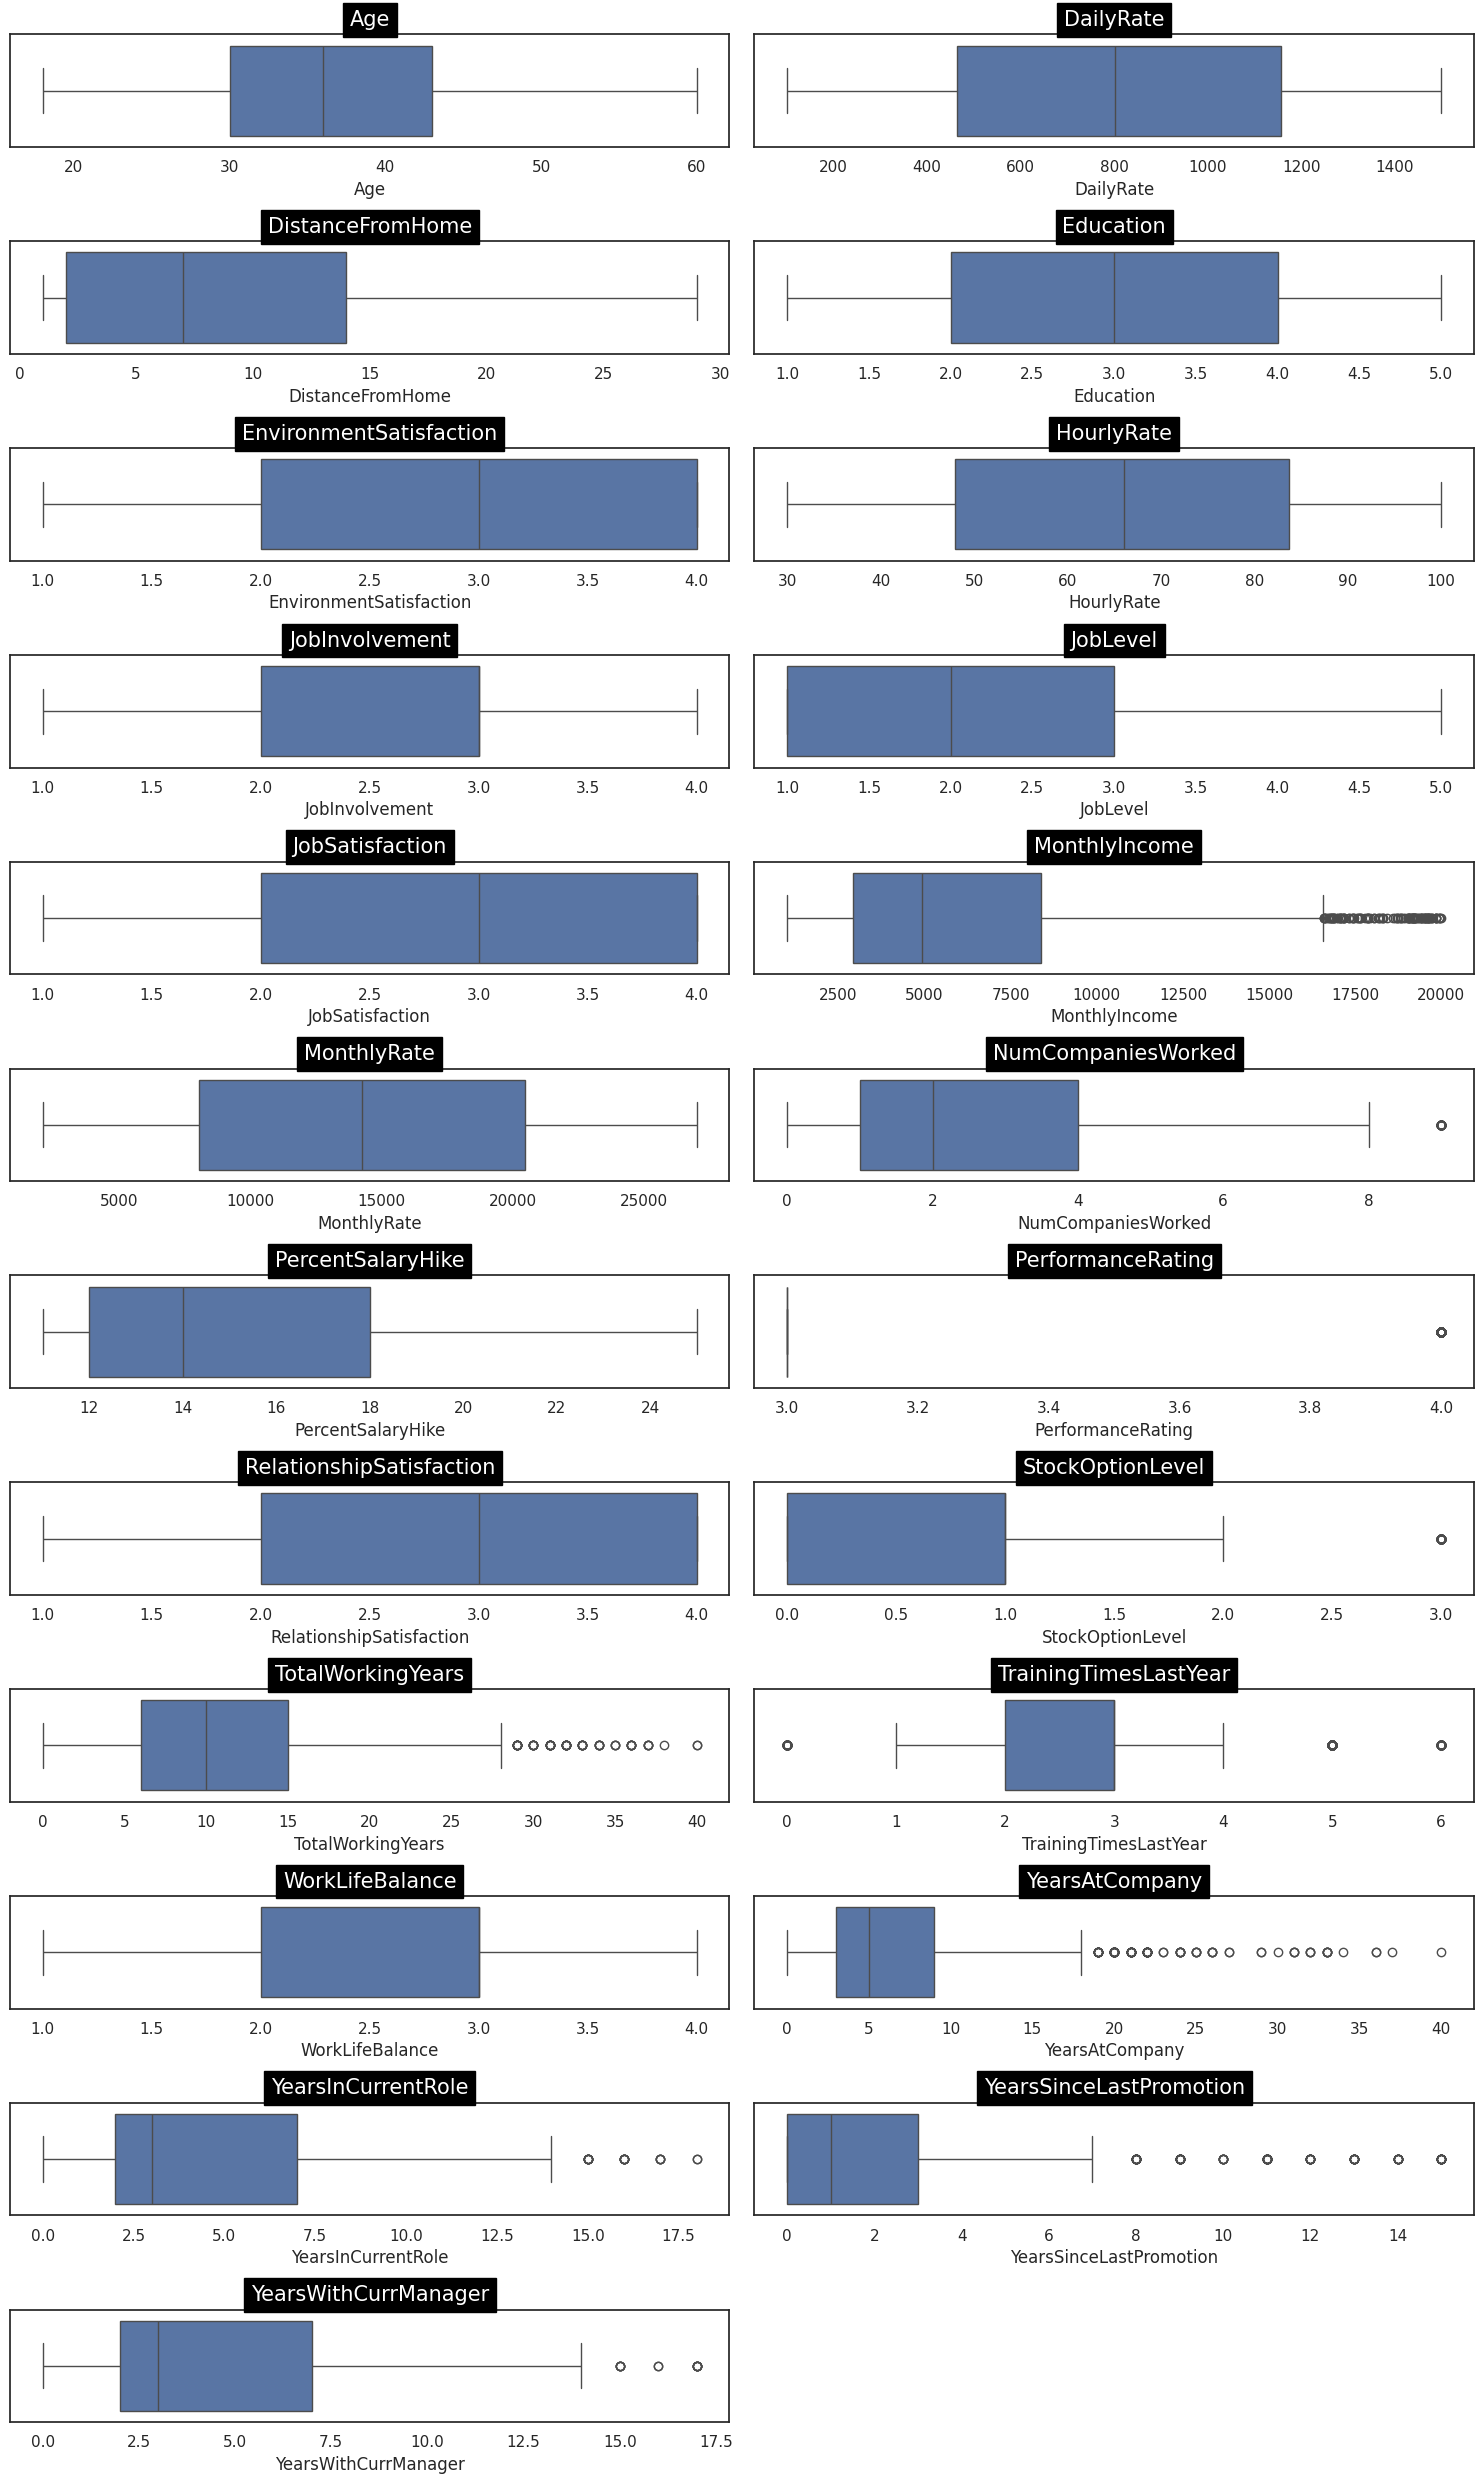

In [278]:
# Create box plots for each numerical column
plt.figure(figsize = (15,25))
for idx, i in enumerate(green_num):
    plt.subplot(12, 2, idx + 1)
    sns.boxplot(x = i, data = df_green)
    plt.title(i,backgroundcolor='black',color='white',fontsize=15)
    plt.xlabel(i, size = 12)
plt.tight_layout()
plt.show()

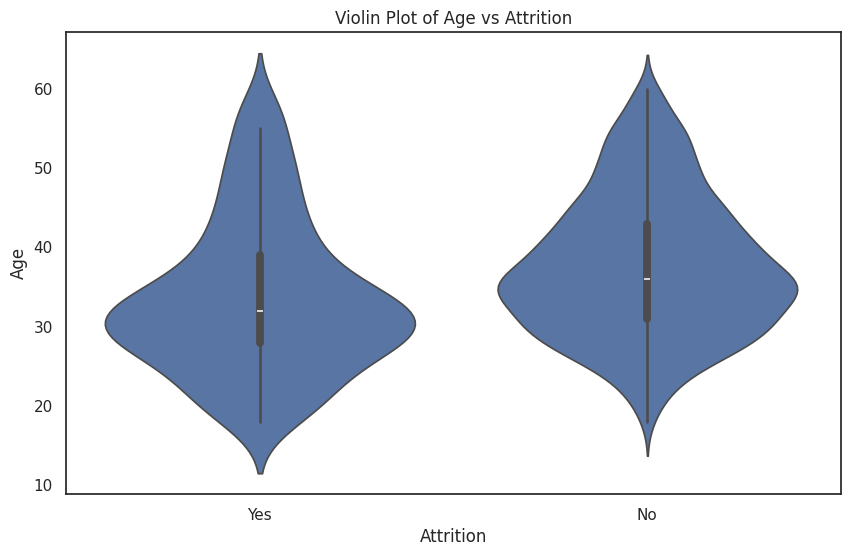

In [279]:

# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x=df_green["Attrition"], y=df_green["Age"], data=df_green)
plt.title('Violin Plot of Age vs Attrition')
plt.xlabel('Attrition')
plt.ylabel('Age')
plt.show()

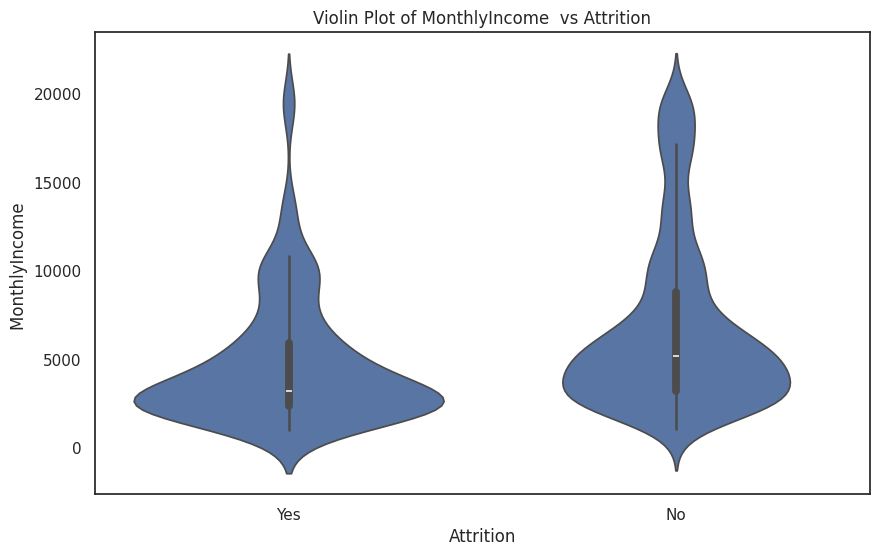

In [280]:
# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x=df_green["Attrition"], y=df_green["MonthlyIncome"], data=df_green)
plt.title('Violin Plot of MonthlyIncome  vs Attrition')
plt.xlabel('Attrition')
plt.ylabel('MonthlyIncome ')
plt.show()

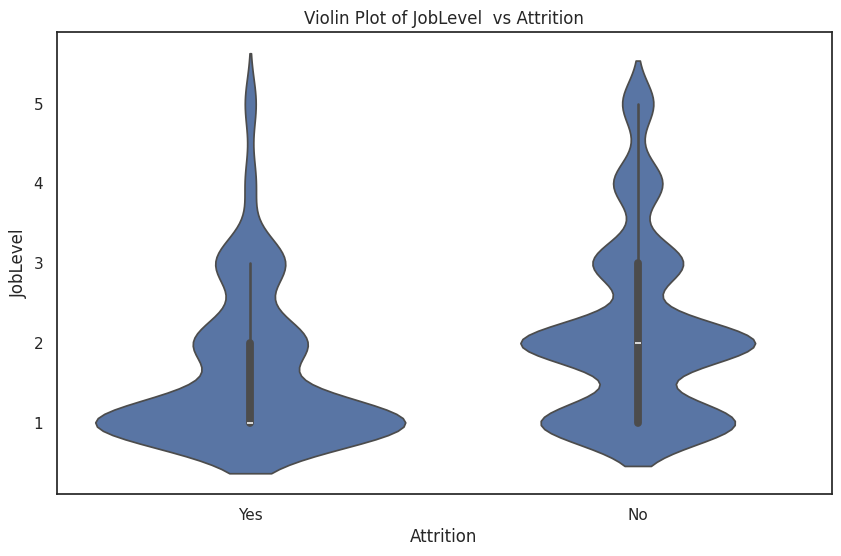

In [281]:
# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x=df_green["Attrition"], y=df_green["JobLevel"], data=df_green)
plt.title('Violin Plot of JobLevel  vs Attrition')
plt.xlabel('Attrition')
plt.ylabel('JobLevel')
plt.show()

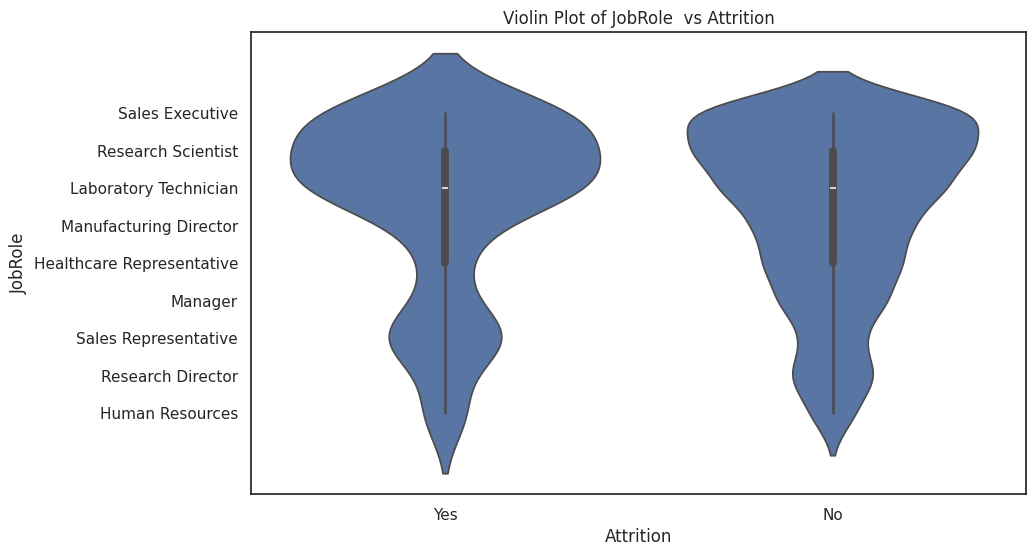

In [282]:
# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x=df_green["Attrition"], y=df_green["JobRole"], data=df_green)
plt.title('Violin Plot of JobRole  vs Attrition')
plt.xlabel('Attrition')
plt.ylabel('JobRole')
plt.show()

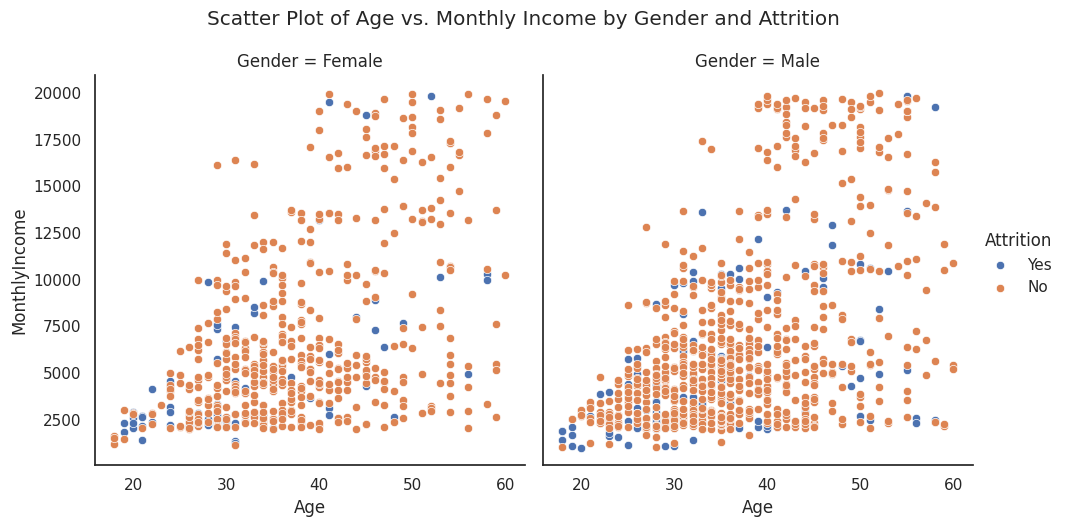

In [283]:

# Create a FacetGrid for scatter plots
g = sns.FacetGrid(df_green, col='Gender', hue='Attrition', height=5, aspect=1)

# Map the scatter plot
g.map(sns.scatterplot, 'Age', 'MonthlyIncome')

# Add legend and titles
g.add_legend()
g.fig.suptitle('Scatter Plot of Age vs. Monthly Income by Gender and Attrition', y=1.05)

# Show the plot
plt.show()


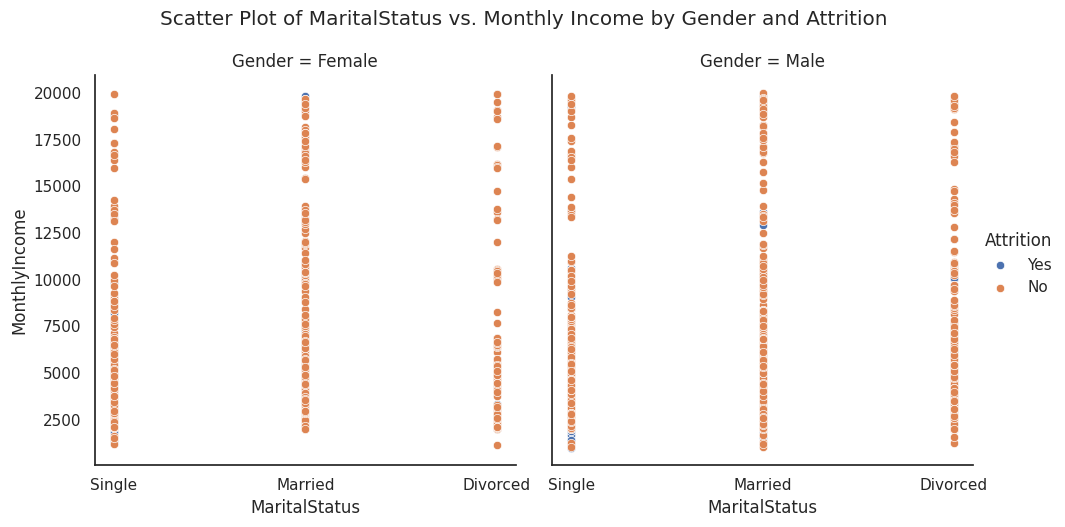

In [284]:

# Create a FacetGrid for scatter plots
g = sns.FacetGrid(df_green, col='Gender', hue='Attrition', height=5, aspect=1)

# Map the scatter plot
g.map(sns.scatterplot, "MaritalStatus", 'MonthlyIncome')

# Add legend and titles
g.add_legend()
g.fig.suptitle('Scatter Plot of MaritalStatus vs. Monthly Income by Gender and Attrition', y=1.05)

# Show the plot
plt.show()


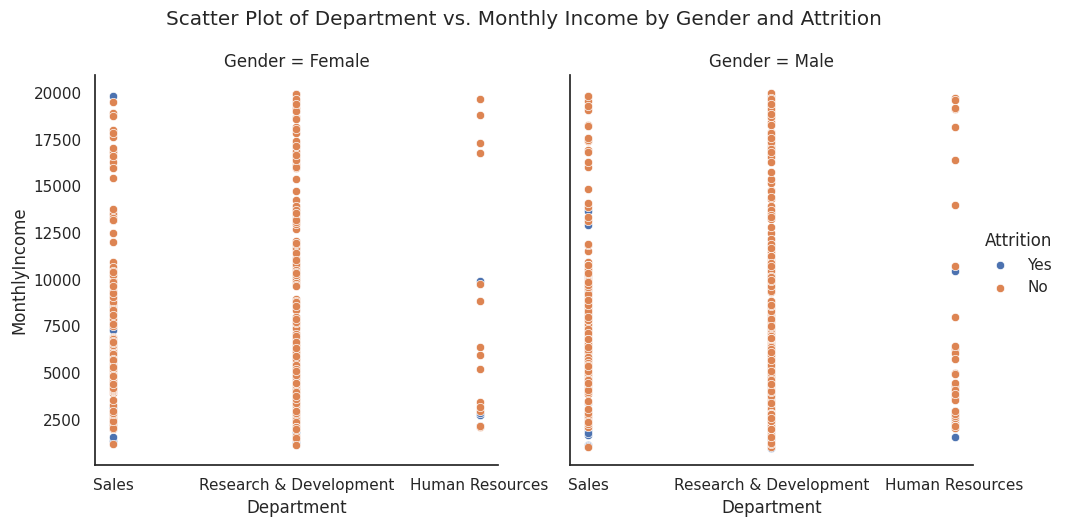

In [285]:

# Create a FacetGrid for scatter plots
g = sns.FacetGrid(df_green, col='Gender', hue='Attrition', height=5, aspect=1)

# Map the scatter plot
g.map(sns.scatterplot, "Department", 'MonthlyIncome')

# Add legend and titles
g.add_legend()
g.fig.suptitle('Scatter Plot of Department vs. Monthly Income by Gender and Attrition', y=1.05)

# Show the plot
plt.show()


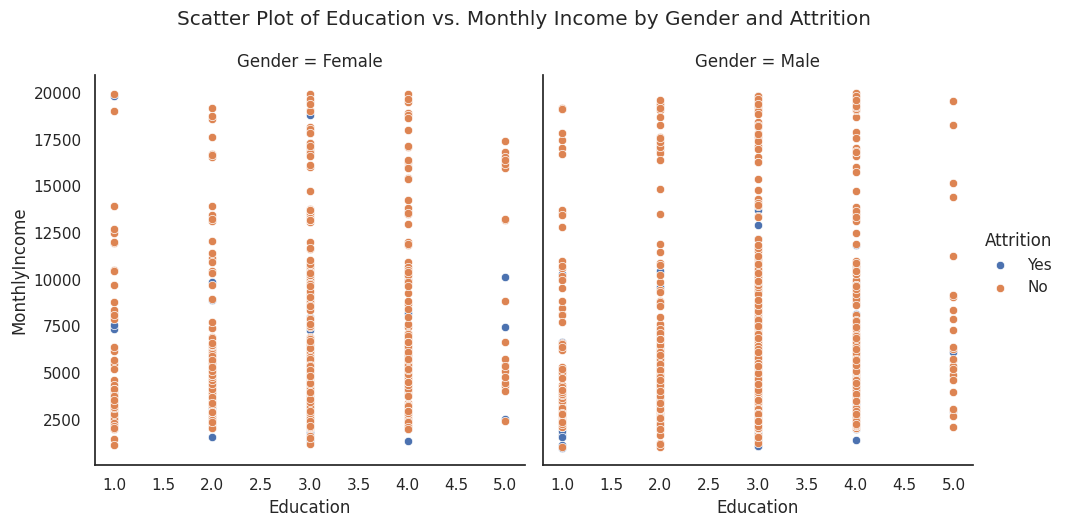

In [286]:

# Create a FacetGrid for scatter plots
g = sns.FacetGrid(df_green, col='Gender', hue='Attrition', height=5, aspect=1)

# Map the scatter plot
g.map(sns.scatterplot, "Education", 'MonthlyIncome')

# Add legend and titles
g.add_legend()
g.fig.suptitle('Scatter Plot of Education vs. Monthly Income by Gender and Attrition', y=1.05)

# Show the plot
plt.show()


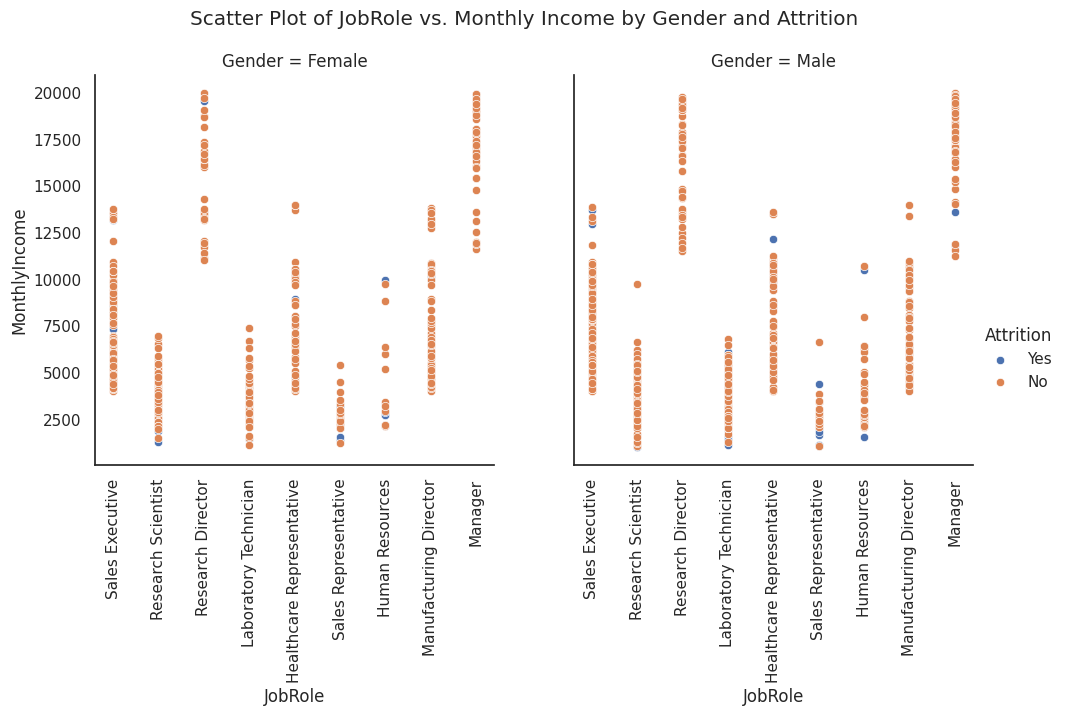

In [287]:

# Create a FacetGrid for scatter plots
g = sns.FacetGrid(df_green, col='Gender', hue='Attrition', height=5, aspect=1)

# Map the scatter plot
g.map(sns.scatterplot, "JobRole", 'MonthlyIncome')

# Add legend and titles
g.add_legend()
g.fig.suptitle('Scatter Plot of JobRole vs. Monthly Income by Gender and Attrition', y=1.05)
rotation = 90
for i, ax in enumerate(g.fig.axes):   ## getting all axes of the fig object
     ax.set_xticklabels(ax.get_xticklabels(), rotation = rotation)
plt.show()

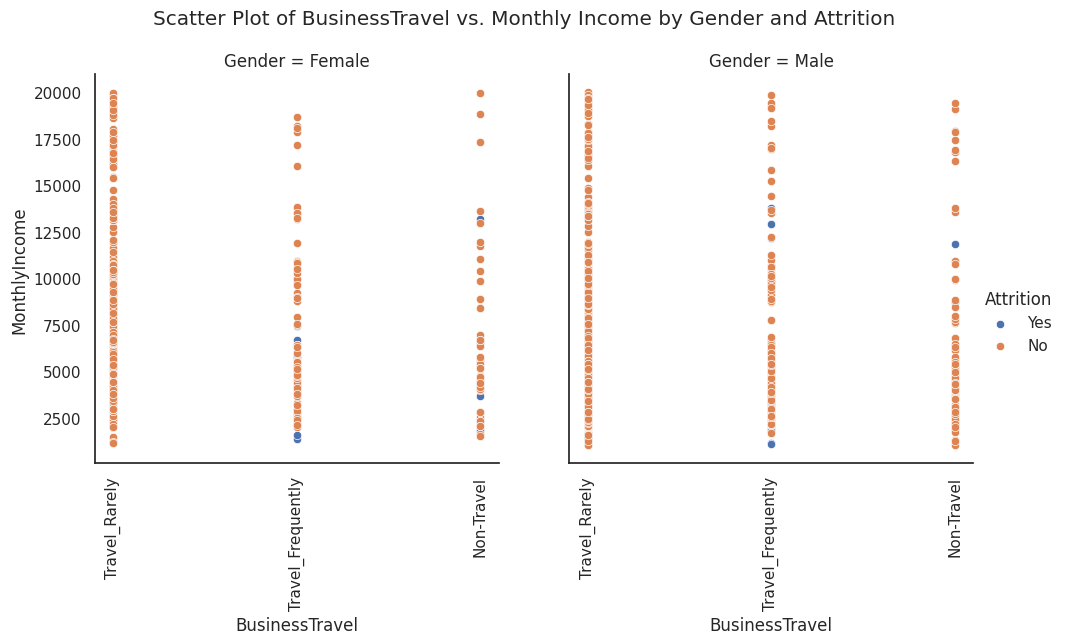

In [288]:
# Create a FacetGrid for scatter plots
g = sns.FacetGrid(df_green, col='Gender', hue='Attrition', height=5, aspect=1)

# Map the scatter plot
g.map(sns.scatterplot, "BusinessTravel", 'MonthlyIncome')

# Add legend and titles
g.add_legend()
g.fig.suptitle('Scatter Plot of BusinessTravel vs. Monthly Income by Gender and Attrition', y=1.05)
rotation = 90
for i, ax in enumerate(g.fig.axes):   ## getting all axes of the fig object
     ax.set_xticklabels(ax.get_xticklabels(), rotation = rotation)
plt.show()

**Analysis**

Age and Attrition:

Attrition is highest for both men and women in the age range of 18 to 35 years and gradually decreases as age increases. This suggests that younger employees are more likely to leave the company compared to older ones.

Income and Attrition:

As monthly income increases, attrition decreases. Employees with higher salaries tend to have lower turnover rates, likely due to better job satisfaction and fewer incentives to leave the company.

Marital Status and Attrition:

Attrition is much lower for divorced women compared to other marital status groups. Divorced employees, especially women, may have more stability and fewer reasons to leave their jobs.

Business Travel and Attrition:

Attrition is higher for employees who frequently travel for business compared to those who travel rarely or not at all. This trend is more pronounced for women than men. Frequent travel can lead to work-life imbalance and job dissatisfaction, contributing to higher turnover.

Job Level and Attrition:

Attrition is highest for employees in job level 1, which typically represents entry-level or junior positions. As job level increases, attrition decreases. Higher-level roles often come with more responsibilities, better compensation, and more opportunities for growth and advancement.

Job Role and Gender:

Women in managerial, research director, and laboratory technician roles have almost no attrition. However, men in sales expert positions have a much higher attrition rate. This suggests that certain job roles may be more attractive or suitable for employees of different genders, leading to varying turnover patterns.
These insights can help organizations identify high-risk groups for attrition and implement targeted retention strategies. By focusing on factors such as age, income, travel requirements, job level, and gender-specific roles, companies can better understand and address employee turnover.

In [289]:
#convert category attributes with only 2 distinct values to numeric by assigning labels
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

# Iterate over each column in the DataFrame
for column in df_green.columns:
    # Check if the column has only two unique values and is of object type (categorical)
    if df_green[column].dtype == 'object':
        # Apply LabelEncoder to the column
        df_green[column] = le.fit_transform(df_green[column])


In [290]:
df_green

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,...,3,4,0,17,3,2,9,6,0,8


In [291]:
df_green.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,0.010146,-0.036311,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.103369,0.029453,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,0.004174,-0.032981,...,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,0.018355,-0.011716,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.019395,-0.041583,...,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,-0.016075,-0.001851,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,-0.027128,-0.016547,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,0.043163,-0.002504,...,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,1.000000,0.000508,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,-0.036311,0.029453,-0.032981,-0.011716,-0.041583,-0.001851,-0.016547,-0.002504,0.000508,1.000000,...,-0.013859,0.022868,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599


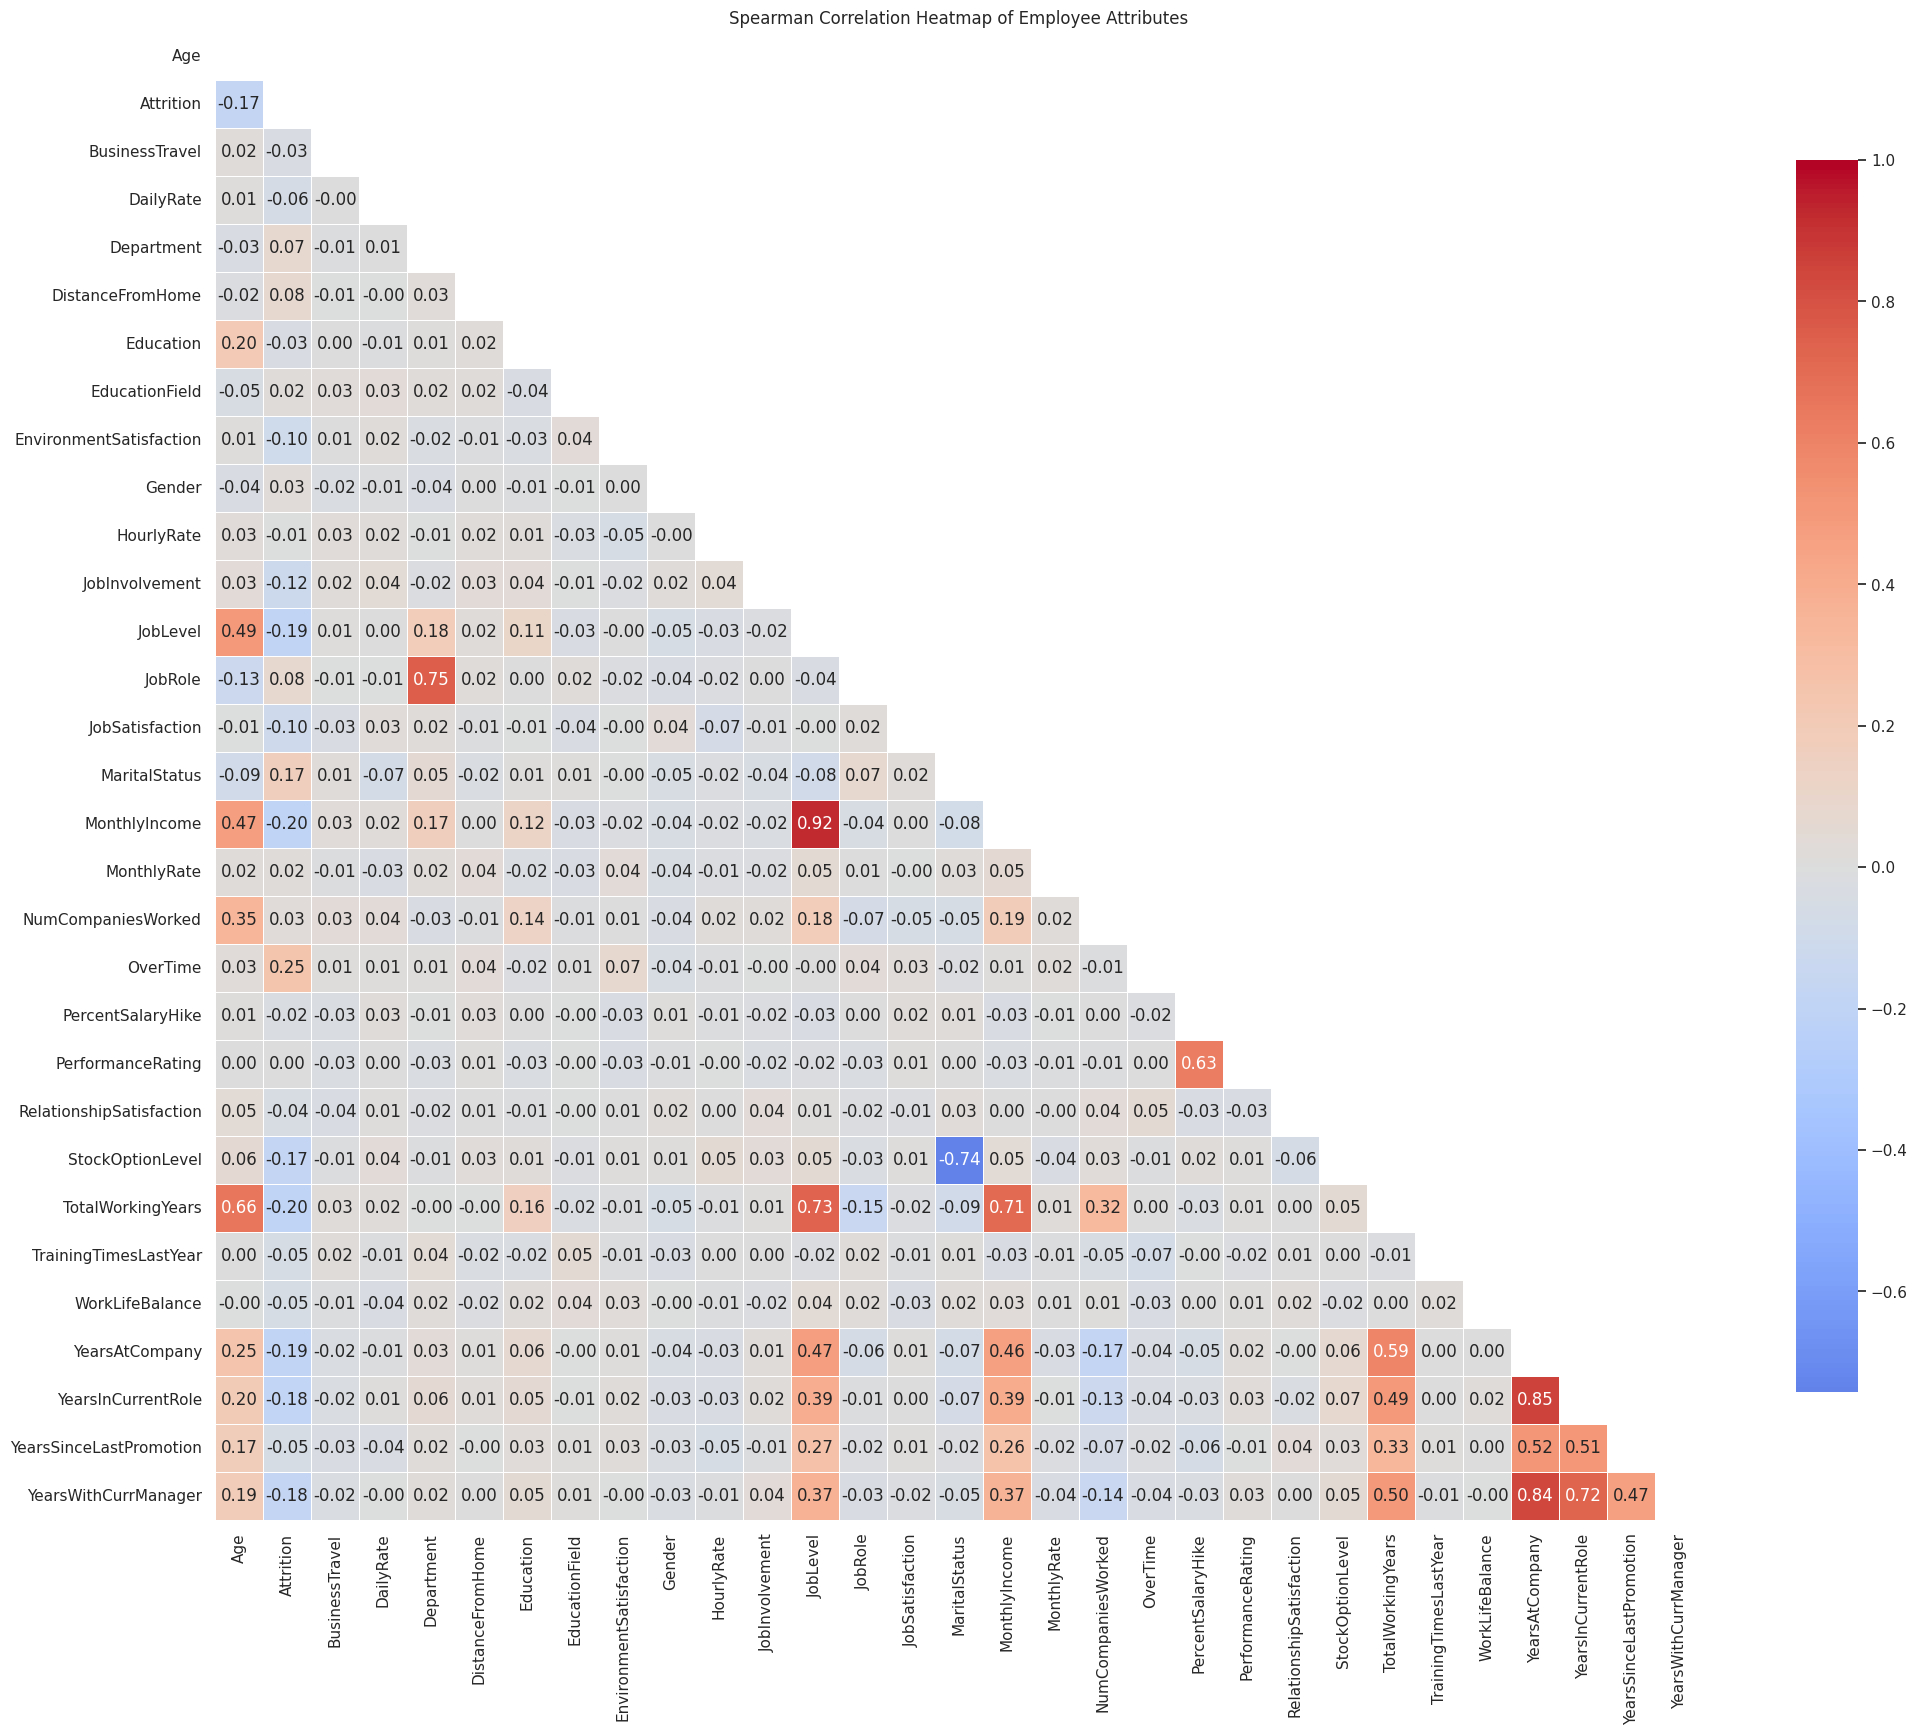

In [292]:
# Calculate the Spearman correlation matrix
corr = df_green.corr(method="spearman")

# Set the style for the seaborn heatmap
sns.set(style="white")

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(24, 20))

# Create the heatmap
sns.heatmap(corr, mask=mask, cmap="coolwarm", vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .8}, annot=True, fmt=".2f")

# Add title
plt.title('Spearman Correlation Heatmap of Employee Attributes')

# Show the plot
plt.show()


**High Correlation Analysis**

Monthly Income & Job Level:

There is a significant positive correlation between MonthlyIncome and JobLevel. This indicates that as employees advance to higher job levels, their monthly income tends to increase. Higher job levels often come with greater responsibilities and, consequently, higher compensation.

Years in Current Role, Years at Company, Years with Current Manager & Years in Current Role:

These features are likely to be highly correlated with each other. For example, YearsInCurrentRole, YearsAtCompany, and YearsWithCurrManager are all measures of tenure and experience within the organization. Employees who have been in their current role for a long time are likely to have also been with the company for a longer duration and may have had the same manager for a significant period. This correlation can indicate employee stability and experience.

Quantile Method for Outlier Detection and Management

**Machine Learning Models**

In [293]:
# Initialize the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

# Fit and transform the selected features
df_green_mm = mm.fit_transform(df_green)

# Convert the NumPy array back to a Pandas DataFrame
df_green_mm = pd.DataFrame(df_green_mm, columns=df_green.columns)

# Display the first few rows of the scaled DataFrame
print(df_green_mm.head())


        Age  Attrition  BusinessTravel  DailyRate  Department  \
0  0.547619        1.0             1.0   0.715820         1.0   
1  0.738095        0.0             0.5   0.126700         0.5   
2  0.452381        1.0             1.0   0.909807         0.5   
3  0.357143        0.0             0.5   0.923407         0.5   
4  0.214286        0.0             1.0   0.350036         0.5   

   DistanceFromHome  Education  EducationField  EnvironmentSatisfaction  \
0          0.000000       0.25             0.2                 0.333333   
1          0.250000       0.00             0.2                 0.666667   
2          0.035714       0.25             0.8                 1.000000   
3          0.071429       0.75             0.2                 1.000000   
4          0.035714       0.00             0.6                 0.000000   

   Gender  ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0     0.0  ...                0.0                  0.000000          0.000000

In [294]:
# Define features and target variable
X = df_green_mm.drop('Attrition', axis=1)  # Features
Y= df_green_mm['Attrition']  # Target variable

In [295]:
x_train  , x_test , y_train, y_test = train_test_split (X ,Y ,test_size = 0.2 , random_state = 0)

In [296]:
#SMOTE
from imblearn.over_sampling import SMOTE
oversampler=SMOTE(random_state=0)
s_train, s_target = oversampler.fit_resample(x_train,y_train)

**LogisticRegression**

In [297]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix




# Initialize and fit the logistic regression model
model = LogisticRegression()
model.fit(s_train, s_target)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[187  58]
 [ 13  36]]
              precision    recall  f1-score   support

         0.0       0.94      0.76      0.84       245
         1.0       0.38      0.73      0.50        49

    accuracy                           0.76       294
   macro avg       0.66      0.75      0.67       294
weighted avg       0.84      0.76      0.78       294



**RandomForest**

In [298]:
# Initialize and fit the Random Forest model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(s_train, s_target)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[241   4]
 [ 36  13]]
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92       245
         1.0       0.76      0.27      0.39        49

    accuracy                           0.86       294
   macro avg       0.82      0.62      0.66       294
weighted avg       0.85      0.86      0.84       294



**Gradient Boosted**

In [263]:
seed=0
gb_params ={
    'n_estimators': 1500,
    'max_features': 0.9,
    'learning_rate' : 0.25,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'subsample': 1,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0}

from sklearn.ensemble import  GradientBoostingClassifier

gb = GradientBoostingClassifier(**gb_params)
gb.fit(s_train, s_target)
gb_predictions = gb.predict(x_test)
print('accuracy',metrics.accuracy_score(y_test, gb_predictions))

accuracy 0.8605442176870748
